Engy-5310: Computational Continuum Transport Phenomena Spring 2021 UMass Lowell; Prof. V. F. de Almeida **06May21**

# Howmework 09 (06May21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (40 pts)](#a1) Poisson axisymmetric heat conduction on an annulus.
 - [1.1)](#a11)(10 pts) Analytical solution.
 - [1.2)](#a12)(10 pts) State the Galerkin variational problem and explain the Dirichlet energy.
 - [1.3)](#a13)(20 pts) Solve problem with the Galerkin FEM and MOOSE framework.
 - [1.4)](#a14)(20 pts) Heating power delivered to coolant.
* [Assignment 2 (45 pts)](#a2) Poisson/Dirichlet 2-D model problem revisited.
 - [2.1)](#a21)(45 pts) Re-solve problem with the Galerkin FEM and MOOSE framework.
 - [2.2)](#a22)(20 pts) Heating power delivered to coolant.
* [Assignment 3 (5 pts)](#a3) 
---

### <span style="color:blue">Given the Poisson heat conduction axisymmetric model problem:</span>
<br>
<span style="color:blue">
    
Compute the temperature function $T:\Omega\subset\Reals^2\rightarrow\Reals$ such that:

\begin{align*}
 -\div_\xpoint(-k\, \grad_\xpoint T) + S &= 0 \quad &\forall \quad \xpoint\in \Omega, \\
 T(\xpoint) &= T_\text{b}(\xpoint)            \quad &\forall \quad \xpoint\in \partial\Omega_\text{D} \\
 \flux(\xpoint)\cdot\normal(\xpoint) &= 0     \quad &\forall \quad \xpoint\in \partial\Omega_\text{N}
\end{align*}
    
where the parameters: 
 + thermal conductivity, $k$, 
 + heat source, $S$, 
 + boundary temperture, $T_\text{b}$, and 
 + rectangular domain $\Omega$, with boundary $\partial\Omega$,

are given below, and the associated Poisson-Dirichlet energy is defined as
    
\begin{align*}
 \Phi[u] := \int\limits_\Omega \,\frac{1}{2}\flux(\xpoint)\cdot \flux(\xpoint) - k\,S\,u(\xpoint) \,dv,
\end{align*}
    
where the heat flux, $\flux:\Omega\rightarrow\Reals^2$, associated to the temperature $T$, is defined as $\flux := -D\,\grad T$.



</span>

In [1]:
'''Plot function for FEM Solution'''

def plot_solution(unit, df, moose_axis='x', moose_axis_name='x',
                  xlabel=r'$x$ []',
                  ylabel=r'$u_h(x)$ []',
                  x_unit=1,
                  y_unit=1,
                  title='No Title', 
                  basis_functions_type='No basis functions type',
                  flux_basis_functions_type='No basis functions type'):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.style.use('dark_background')

    (fig, ax1) = plt.subplots(1, figsize=(14, 5))

    ax1.plot(df[moose_axis]/x_unit, df['u']/y_unit,'r*-',label=basis_functions_type)

    ax1.set_xlabel(xlabel, fontsize=18)
    ax1.set_ylabel(ylabel, fontsize=18, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    #ax1.get_yaxis().get_major_formatter().set_scientific(False)
    #ax1.set_ylim(0, 1.1*max(df['u']))
    ax1.grid(True)

    if 'diffFluxU_'+moose_axis in df.columns:
        # create a twin x axis to be shared
        ax2 = ax1.twinx()

        ax2.plot(df[moose_axis]/unit.cm, df['diffFluxU_'+moose_axis]/(unit.watt/unit.cm**2),'*-', color='yellow', label=flux_basis_functions_type)

        ax2.set_ylabel(r'$q_{h,'+moose_axis_name+'}$ [W/cm$^2$]', fontsize=16, color='yellow')
        ax2.tick_params(axis='y', labelcolor='yellow', labelsize=14)
        ax2.legend(loc='center right', fontsize=12)
        #ax2.get_yaxis().get_major_formatter().set_scientific(False)
        #ax2.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

## <span style="color:blue">[Assignment 1 (40 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(10 pts) Obtain the analytical solution to this problem.
<a id="a11"></a>

### <span style="color:blue">[1.2)](#toa)(10 pts) State the Galerkin variational problem and explain what the Dirichlet energy means.
</span><a id="a12"></a>

### <span style="color:blue">[1.3)](#toa)(20 pts) Using the Galerkin FEM and the MOOSE framework solve the heat conduction problem stated above on the $r-z$ plane of an annular pin domain using the following parameters:</span>
<br>
<span style="color:blue">
    
|       Description          |      Value         |            Units               |
|----------------------------|--------------------|--------------------------------|
| Pin inner diameter |   $3/4$               | $\text{inch}$                    |
| Annular thickness |   $1$                | $\text{inch}$                    |
| Pin length to outer diameter ratio    |     $4.5$               | -   |
| Thermal conductivity      |   $140$   | $\frac{\text{W}}{\text{m K}}$ |
| Source                         |   $237$              | $\frac{\text{W}}{\text{cc}}$ |
| Pin inner temperature (coolant side) |  $298$ | C | 
| Pin outer surface |  | insulated |
| Pin ends       | | insulated |
    
</span>    

### <span style="color:blue">Reproduce the results below using linear Lagrange FEM basis functions and report on the FEM parameters needed and compute the error as compared with the exact solution in 20 equally spaced points in the radial direction.</span><a id="a13"></a>

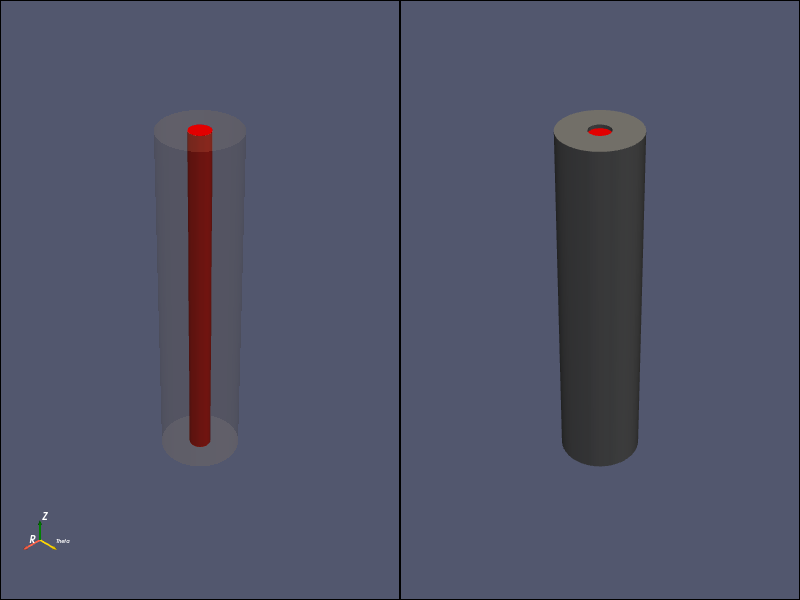

In [1]:
'''Domain viz for info purposes'''

import pyvista as pv
pv.set_plot_theme('paraview')

height = 4.5*(3/4+2*1)
radius_i = 3/4 / 2
radius_o = radius_i + 1
coolant = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_i)
pin = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_o)

plo = pv.Plotter(notebook=True,shape=(1,2)) 

plo.subplot(0,0)
plo.add_mesh(coolant, color='red', opacity=1.0,)
plo.add_mesh(pin, color='tan', opacity=0.99)
plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Z')

pin = pin.triangulate()
tmp = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height*1.1, radius=radius_i).triangulate()
tmp.flip_normals()

pin = pin.boolean_cut(tmp)
plo.subplot(0,1)
plo.add_mesh(pin, 'grey')
plo.add_mesh(pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height*.98, radius=radius_i), 'red')
cpos = plo.show(window_size=[800, 600])

In [3]:
'''Parameters'''


In [4]:
'''FEM Solution and Flux'''


In [5]:
'''Display MOOSE input file created'''


# Engy-5310 Problem: Poisson 2D FEM
# UMass Lowell Nuclear Chemical Engineering
# Prof. Valmor F. de Almeida
# 12Apr21 10:05:24

# Parameters
xmin = 9.52500e-03
xmax = 3.49250e-02
ymin = -1.57162e-01
ymax = 1.57162e-01
diff_coeff = 1.40000e+02
source_s = 2.37000e+08
u_left = 5.71150e+02

[Problem]
  type = FEProblem
  coord_type = RZ
  rz_coord_axis = Y
[]

[Mesh]
  [2d]
    type = GeneratedMeshGenerator
    dim = 2
    xmin = ${replace xmin}
    xmax = ${replace xmax}
    ymin = ${replace ymin}
    ymax = ${replace ymax}
    nx = 25
    ny = 225
  []
[]

[Variables]
  [u]
    order = first
    family = lagrange
  []
[]

[AuxVariables]
  [diffFluxU]
    order = CONSTANT
    family = MONOMIAL_VEC
  []
  [diffFluxU_x]
    order = CONSTANT
    family = MONOMIAL
  []
  [diffFluxU_y]
    order = CONSTANT
    family = MONOMIAL
  []
[]

[Kernels]
  [diffusion-term]
    type = DiffusionTerm
    variable = u     # produced quantity
    diffCoeff = ${replace diff_coeff}
  []
  [source-term]
    

In [6]:
'''Run Engy5310P1 MOOSE App'''




Framework Information:
MOOSE Version:           git commit 52562be492 on 2021-04-09
LibMesh Version:         27141d18f3137f77e33cdb3d565fd38ebfbfc46f
PETSc Version:           3.15.0
SLEPc Version:           3.14.2
Current Time:            Mon Apr 12 10:05:24 2021
Executable Timestamp:    Sun Apr 11 14:44:08 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          2
  Spatial Dimension:       2
  Nodes:                   
    Total:                 5876
    Local:                 5876
  Elems:                   
    Total:                 5625
    Local:                 5625
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                5876
  Num Local DOFs:          5876
  Variables:               "u" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "FIRST" 

Auxiliary System:
  Num DOFs:                22500
  Num Local DOFs:       

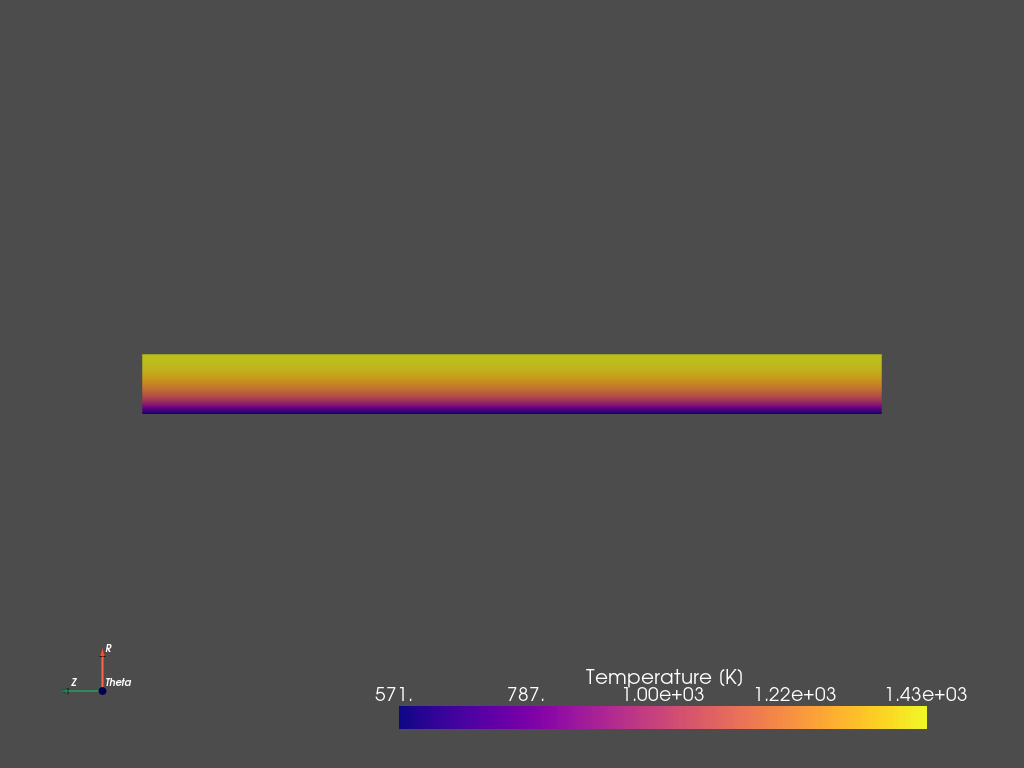

In [7]:
'''Show 2D solution'''


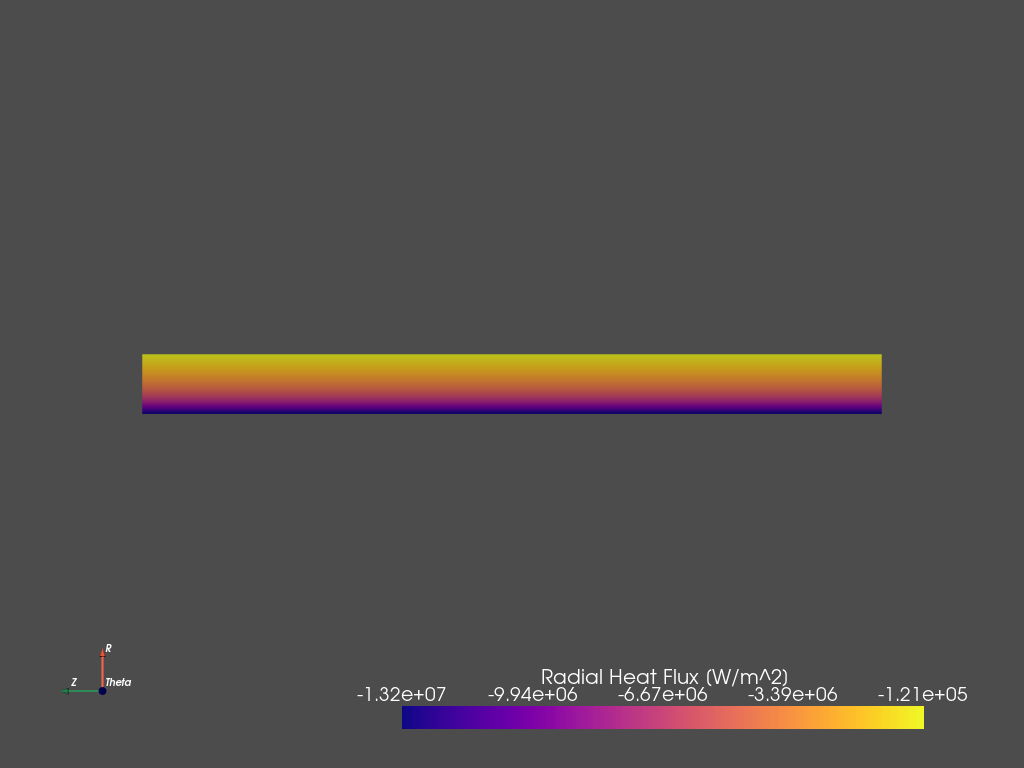

In [8]:
'''Show 2D solution'''


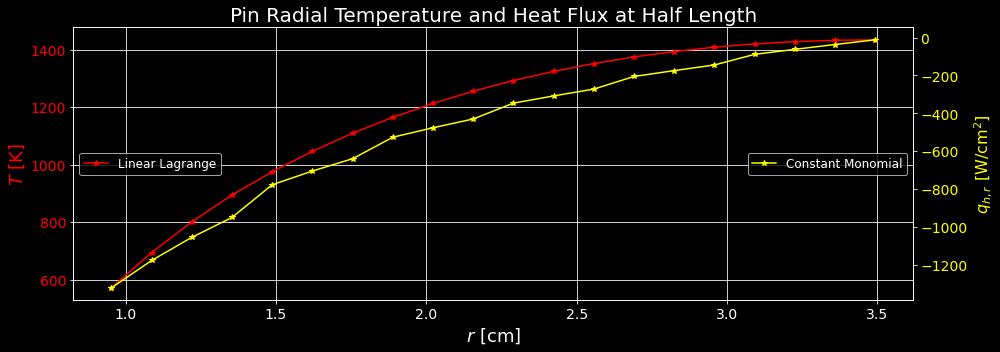


Temperature max. =  1434.21 [K] =  1161.06 [C]
Temperature min. =   571.15 [K] =   298.00 [C]
Heat flux abs. max. = 1.32 [kW/cm^2] = 13.22 [MW/m^2]


In [9]:
'''Show FEM Solution and Flux'''


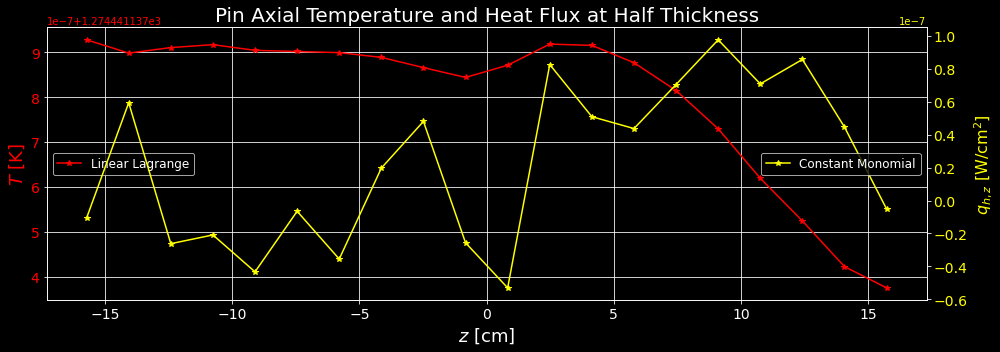


Average temperature (@ r = 2.22e+00 [cm]) =  1274.44 (std: 1.74e-07) [K]
Average z heat flux (@ r = 2.22e+00 [cm]) = 2.23e-08 (std: 4.83e-08) [W/cm^2]


In [10]:
'''Show FEM Solution and Flux'''


In [11]:
'''Dirichlet/Neumann Energy'''


Dirichlet/Neumann energy = -3.39525e+04 [(kW)^2/m]


### <span style="color:blue">[1.4)](#toa)(45 pts) Compute the heating power delivered to the coolant if the pin is 1 meter long.</span>
</span><a id="a14"></a>

Heating Power Delivered to Coolant [kW] = 790.98


## <span style="color:blue">[Assignment 2 (45 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(45 pts) Using the Galerkin FEM and the MOOSE framework solve the diffusion problem in 1.3) using quadratic Lagrange polynomial basis functions with the same FEM parameters; see results below. Compute the error on 20 points equally distributed in the radial direction.</span>
</span><a id="a21"></a>

In [13]:
'''FEM Solution and Flux'''


In [14]:
'''Display MOOSE input file created'''


# Engy-5310 Problem: Poisson 2D FEM
# UMass Lowell Nuclear Chemical Engineering
# Prof. Valmor F. de Almeida
# 12Apr21 10:05:27

# Parameters
xmin = 9.52500e-03
xmax = 3.49250e-02
ymin = -1.57162e-01
ymax = 1.57162e-01
diff_coeff = 1.40000e+02
source_s = 2.37000e+08
u_left = 5.71150e+02

[Problem]
  type = FEProblem
  coord_type = RZ
  rz_coord_axis = Y
[]

[Mesh]
  [2d]
    type = GeneratedMeshGenerator
    dim = 2
    xmin = ${replace xmin}
    xmax = ${replace xmax}
    ymin = ${replace ymin}
    ymax = ${replace ymax}
    nx = 25
    ny = 225
    elem_type = QUAD9
  []
[]

[Variables]
  [u]
    order = second
    family = lagrange
  []
[]

[AuxVariables]
  [diffFluxU]
    order = FIRST
    family = MONOMIAL_VEC
  []
  [diffFluxU_x]
    order = FIRST
    family = MONOMIAL
  []
  [diffFluxU_y]
    order = FIRST
    family = MONOMIAL
  []
[]

[Kernels]
  [diffusion-term]
    type = DiffusionTerm
    variable = u     # produced quantity
    diffCoeff = ${replace diff_coeff}
  []
  [sou

In [15]:
'''Run Engy5310P1 MOOSE App'''




Framework Information:
MOOSE Version:           git commit 52562be492 on 2021-04-09
LibMesh Version:         27141d18f3137f77e33cdb3d565fd38ebfbfc46f
PETSc Version:           3.15.0
SLEPc Version:           3.14.2
Current Time:            Mon Apr 12 10:05:27 2021
Executable Timestamp:    Sun Apr 11 14:44:08 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          2
  Spatial Dimension:       2
  Nodes:                   
    Total:                 23001
    Local:                 23001
  Elems:                   
    Total:                 5625
    Local:                 5625
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                23001
  Num Local DOFs:          23001
  Variables:               "u" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Auxiliary System:
  Num DOFs:                67500
  Num Local DOFs:  

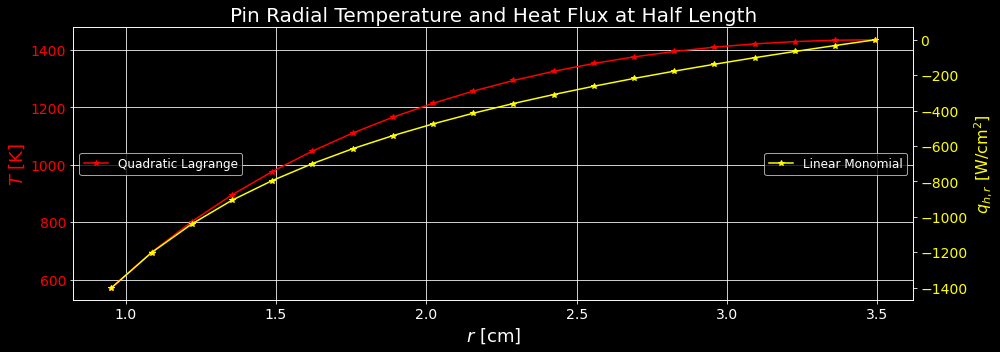


Temperature max. =  1434.75 [K] =  1161.60 [C]
Temperature min. =   571.15 [K] =   298.00 [C]
Heat flux max. = 1.40 [kW/cm^2] = 14.02 [MW/m^2]


In [16]:
'''Show FEM Solution and Flux'''


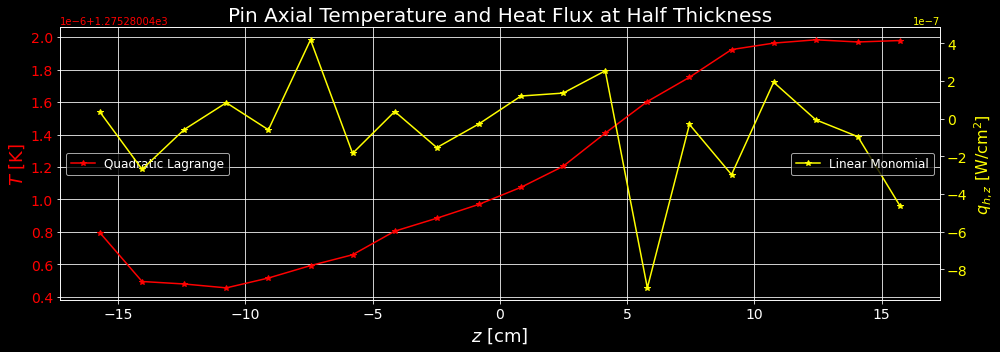


Average temperature (@ r = 2.22e+00 [cm]) =  1275.28 (std: 5.90e-07) [K]
Average z heat flux (@ r = 2.22e+00 [cm]) = -6.34e-08 (std: 2.81e-07) [W/cm^2]


In [17]:
'''Show FEM Solution and Flux'''


In [18]:
'''Dirichlet/Neumann Energy'''


Dirichlet/Neumann energy = -3.39660e+04 [(kW)^2/m]


### <span style="color:blue">[2.2)](#toa)(45 pts) Compute the heating power delivered to the coolant if the pin is 1 meter long.</span>
</span><a id="a22"></a>

Heating Power Delivered to Coolant [kW] = 839.07


## <span style="color:blue">[Assignment 3 (5 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

**Answer:**